<a href="https://colab.research.google.com/github/khimmari/dropout_species/blob/main/TypeBetta_ImageAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = "/content/drive/MyDrive/typebetta"
data_dir = pathlib.Path(dataset_url)

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

2708


In [ ]:
batch_size = 32
img_height = 128
img_width = 128

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2708 files belonging to 11 classes.
Using 2167 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2708 files belonging to 11 classes.
Using 541 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Butterfly Betta', 'Crowntail Betta', 'Double Tail Betta', 'Dumbo Betta', 'Galaxy Betta', 'Giant Betta', 'Halfmoon Betta', 'Imbellis Betta', 'Shotfin Splendens Betta', 'Smaragdina Betta', 'Splendens Betta']


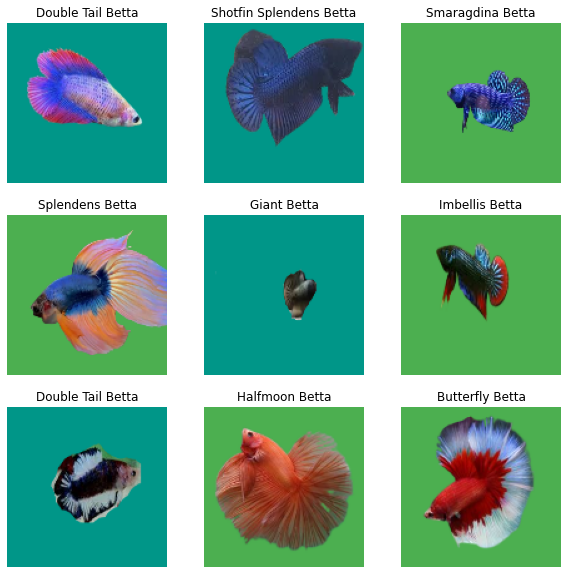

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#ทำการ normalization แปลงค่าสี เป็น 0 1 
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [ ]:
history = model.fit(train_ds,
                  batch_size=batch_size,
                  epochs=100,
                  verbose=1,
                  validation_data=val_ds)

Epoch 1/100
68/68 [==============================] - 121s 2s/step - loss: 1.5155 - accuracy: 0.4158 - val_loss: 1.0986 - val_accuracy: 0.5250
Epoch 2/100
68/68 [==============================] - 33s 483ms/step - loss: 0.9024 - accuracy: 0.6830 - val_loss: 0.8200 - val_accuracy: 0.7190
Epoch 3/100
68/68 [==============================] - 33s 482ms/step - loss: 0.6581 - accuracy: 0.7651 - val_loss: 0.7449 - val_accuracy: 0.7523
Epoch 4/100
68/68 [==============================] - 33s 483ms/step - loss: 0.5314 - accuracy: 0.8131 - val_loss: 0.7621 - val_accuracy: 0.7542
Epoch 5/100
68/68 [==============================] - 33s 482ms/step - loss: 0.4129 - accuracy: 0.8533 - val_loss: 0.6946 - val_accuracy: 0.7394
Epoch 6/100
68/68 [==============================] - 33s 482ms/step - loss: 0.2902 - accuracy: 0.9054 - val_loss: 0.7447 - val_accuracy: 0.7708
Epoch 7/100
68/68 [==============================] - 33s 481ms/step - loss: 0.2600 - accuracy: 0.9086 - val_loss: 0.7516 - val_accuracy: 0

In [ ]:
import plotly
import plotly.graph_objs as go
h1 = go.Scatter(y=history.history['loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                    name="val_loss"
                   )
data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='Epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1, filename='Unrepresentative Validation Dataset')

In [ ]:
h1 = go.Scatter(y=history.history['accuracy'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                        name="acc"
                   )
h2 = go.Scatter(y=history.history['val_accuracy'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                        name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)

In [ ]:
score = model.evaluate(val_ds,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 1.7372384071350098
Test Accuracy: 0.8059149980545044


**Batch**

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

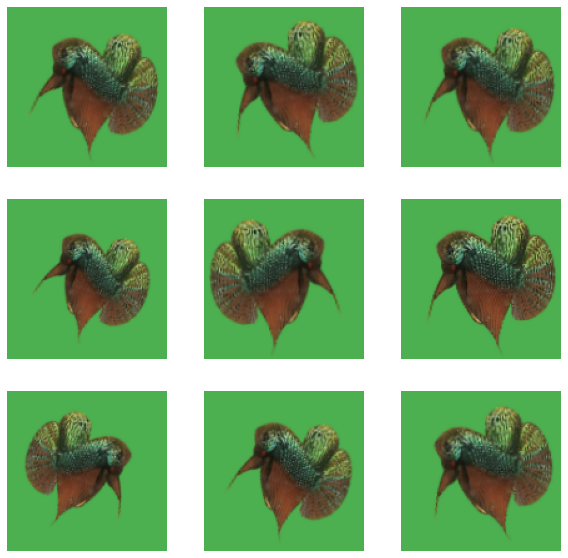

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                  

In [ ]:
history = model.fit(train_ds,
                  batch_size=batch_size,
                  epochs=100,
                  verbose=1,
                  validation_data=val_ds)

Epoch 1/100
68/68 [==============================] - 39s 563ms/step - loss: 1.3742 - accuracy: 0.5164 - val_loss: 2.1417 - val_accuracy: 0.1959
Epoch 2/100
68/68 [==============================] - 38s 560ms/step - loss: 0.8403 - accuracy: 0.6876 - val_loss: 1.9441 - val_accuracy: 0.5360
Epoch 3/100
68/68 [==============================] - 38s 558ms/step - loss: 0.7058 - accuracy: 0.7351 - val_loss: 1.8240 - val_accuracy: 0.4584
Epoch 4/100
68/68 [==============================] - 38s 560ms/step - loss: 0.6067 - accuracy: 0.7803 - val_loss: 1.4988 - val_accuracy: 0.5933
Epoch 5/100
68/68 [==============================] - 38s 560ms/step - loss: 0.5190 - accuracy: 0.7997 - val_loss: 1.2533 - val_accuracy: 0.6063
Epoch 6/100
68/68 [==============================] - 38s 559ms/step - loss: 0.5147 - accuracy: 0.8136 - val_loss: 0.9283 - val_accuracy: 0.7153
Epoch 7/100
68/68 [==============================] - 38s 563ms/step - loss: 0.4256 - accuracy: 0.8376 - val_loss: 1.0981 - val_accuracy:

In [ ]:
import plotly
import plotly.graph_objs as go
h1 = go.Scatter(y=history.history['loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                    name="val_loss"
                   )
data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='Epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1, filename='Unrepresentative Validation Dataset')

In [ ]:
h1 = go.Scatter(y=history.history['accuracy'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                        name="acc"
                   )
h2 = go.Scatter(y=history.history['val_accuracy'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                        name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)

In [ ]:
score = model.evaluate(val_ds,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

**Metric**

In [ ]:
predicted_classes = model.predict(val_ds)
predicted_classes = np.argmax(predicted_classes, axis=1)

In [ ]:
y_true = tf.concat([y for x, y in val_ds], axis=0)

In [ ]:
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(predicted_classes, y_true)

In [ ]:
labels = ['Butterfly Betta', 'Crowntail Betta', 'Double Tail Betta', 'Dumbo Betta', 'Galaxy Betta', 'Giant Betta', 'Halfmoon Betta', 'Imbellis Betta', 'Shotfin Splendens Betta', 'Smaragdina Betta', 'Splendens Betta']

In [ ]:
def cm_plot(cm, labels):
    x = labels
    y = labels

    z_text = [[str(y) for y in x] for x in cm]
    fig = ff.create_annotated_heatmap(cm, x=x, y=y, annotation_text=z_text, colorscale='blues')

    fig.update_layout(title_text='Confusion Matrix')

    fig.add_annotation(dict(font=dict(color="black",size=13),
                            x=0.5,
                            y=-0.15,
                            showarrow=False,
                            text="Predicted Value",
                            xref="paper",
                            yref="paper"
                           ))

    fig.add_annotation(dict(font=dict(color="black",size=13),
                            x=-0.20,
                            y=0.5,
                            showarrow=False,
                            text="Real Value",
                            textangle=-90,
                            xref="paper",
                            yref="paper"
                           ))

    fig.update_layout(margin=dict(t=50, l=200))
    fig['layout']['yaxis']['autorange'] = "reversed"

    fig['data'][0]['showscale'] = True
    fig.show()

In [ ]:
import plotly.figure_factory as ff
cm_plot(cm, labels)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_true, predicted_classes, target_names=labels, digits=4))

**Save**

In [ ]:
import pickle as p

In [ ]:
filepath_history_model = 'history_model'

with open(filepath_history_model, 'wb') as file:
    p.dump(history.history, file)

In [ ]:
filepath='modeltypebetta_batchnormalize.h5'
model.save(filepath)

In [ ]:
filepath_model = 'modeltypebetta_batchnormalize.json'
filepath_weights = 'weightsmodeltypebetta_batchnormalize.h5'

model_json = model.to_json()
with open(filepath_model, "w") as json_file:
    json_file.write(model_json)
    model.save_weights(filepath_weights)

**Load**

In [ ]:
with open(filepath_history_model, 'rb') as file:
    his = p.load(file)

In [ ]:
with open('history_model', 'rb') as file:
     history = p.load(file)
filepath='modeltypebetta_batchnormalize.h5'
filepath_model = 'modeltypebetta_batchnormalize.json'
filepath_weights = 'weightsmodeltypebetta_batchnormalize.h5'
h1 = go.Scatter(y=history['loss'], 
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=history['val_loss'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )
data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data, layout=layout1)
plotly.offline.iplot(fig1, filename="testMNIST")

In [ ]:
with open('history_model', 'rb') as file:
     history = p.load(file)
filepath='modeltypebetta_batchnormalize.h5'
filepath_model = 'modeltypebetta_batchnormalize.json'
filepath_weights = 'weightsmodeltypebetta_batchnormalize.h5'
h1 = go.Scatter(y=history['accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=history['val_accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )
data = [h1,h2]
layout1 = go.Layout(title='accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data, layout=layout1)
plotly.offline.iplot(fig1, filename="testMNIST")

In [ ]:
from tensorflow.keras.models import model_from_json
predict_model = load_model(filepath) 
predict_model.summary()
with open(filepath_model, 'r') as f:
    loaded_model_json = f.read()
    predict_model = model_from_json(loaded_model_json)
    predict_model.load_weights(filepath_weights)    
    print("Loaded model from disk")

In [ ]:
score = model.evaluate(val_ds,verbose=0)
print("Test Loss:",score[0]*100)
print("Test Accuracy:",score[1]*100)

**Predict**

In [ ]:
import requests
from IPython.display import Image
from io import BytesIO
test_path = ("/content/drive/MyDrive/2.png")
img = tf.keras.preprocessing.image.load_img(
    test_path, target_size=(img_width , img_height)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

display(Image(filename=test_path,width=250, height=250))
if score[0]==np.max(score) :
    typeBetta = "Butterfly Betta"
if score[1]==np.max(score) :
    typeBetta = "Crowntail Betta"
if score[2]==np.max(score) :
    typeBetta = "Double Tail Betta"
if score[3]==np.max(score) :
    typeBetta = "Dumbo Betta"
if score[4]==np.max(score) :
    typeBetta = "Galaxy Betta"
if score[5]==np.max(score) :
    typeBetta = "Giant Betta"
if score[6]==np.max(score) :
    typeBetta = "Halfmoon Betta"
if score[7]==np.max(score) :
    typeBetta = "Imbellis Betta"
if score[8]==np.max(score) :
    typeBetta = "Shotfin Splendens Betta"
if score[9]==np.max(score) :
    typeBetta = "Smaragdina Betta"
if score[10]==np.max(score) :
    typeBetta = "Splendens Betta"
print(
    "This image most likely belongs to  {} {:.2f}%."
    .format(typeBetta, 100 * np.max(score))
)